In [1]:
import sys
DIR_PATH = '/Users/debryas/Desktop/PhD_work/HNL_tau_analysis/hnl-coffea-analysis'
sys.path.append(DIR_PATH)

#!/usr/bin/env python
from coffea import processor
from coffea.nanoevents import NanoAODSchema
NanoAODSchema.warn_missing_crossrefs = True
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import pickle

from helpers import files_from_path
from stitching.WJets.CountEventsWJets import CountEventsNJetsHT

file_dir = '/Users/debryas/cernbox/HNL/nanoV10/Run2_2018/'

inclusive_samples = ['WJetsToLNu']

exclusive_samples_NJets = [
    'W1JetsToLNu',
    'W2JetsToLNu',
    'W3JetsToLNu',
    'W4JetsToLNu']

exclusive_samples_HT = [
    'WJetsToLNu_HT-70To100',
    'WJetsToLNu_HT-100To200',
    'WJetsToLNu_HT-200To400',
    'WJetsToLNu_HT-400To600',
    'WJetsToLNu_HT-600To800',
    'WJetsToLNu_HT-800To1200',
    'WJetsToLNu_HT-1200To2500',
    'WJetsToLNu_HT-2500ToInf']

exclusive_samples = exclusive_samples_NJets + exclusive_samples_HT
all_samples = inclusive_samples+exclusive_samples_NJets+exclusive_samples_HT
nPtZbin = len(CountEventsNJetsHT.get_HT_bins())

PS_regions = []
for NJets in CountEventsNJetsHT.get_NJets_bins():
    for HTbin in CountEventsNJetsHT.get_HT_bins():
        PS_regions.append(f'sumw_HT-{HTbin}_Jets-{NJets}')

samples = {}
for element in all_samples:
    samples[element] = files_from_path(file_dir+element)

In [2]:
EventsNotSelected_counter = processor.run_uproot_job(
    samples,
    'EventsNotSelected',
    CountEventsNJetsHT(),
    processor.iterative_executor,
    {"schema": NanoAODSchema, 'workers': 6},
)

with open(f'{DIR_PATH}/results/EventsNotSelected_WJetsToLNu_NJets-HT.pkl', 'wb') as f:
        pickle.dump(EventsNotSelected_counter, f)

EventsSelected_counter = processor.run_uproot_job(
    samples,
    'Events',
    CountEventsNJetsHT(),
    processor.iterative_executor,
    {"schema": NanoAODSchema, 'workers': 6},
)

with open(f'{DIR_PATH}/results/EventsSelected_WJetsToLNu_NJets-HT.pkl', 'wb') as f:
        pickle.dump(EventsSelected_counter, f)

Processing: 100%|██████████| 14/14 [01:21<00:00,  5.82s/chunk]


In [2]:
with open(f'{DIR_PATH}/results/EventsNotSelected_WJetsToLNu_NJets-HT.pkl', 'rb') as f:
    EventsNotSelected_counter = pickle.load(f)
with open (f'{DIR_PATH}/results/EventsSelected_WJetsToLNu_NJets-HT.pkl', 'rb') as f:
    EventsSelected_counter = pickle.load(f)

In [3]:
#sumary sumw
print(f'| {"Samples":<25}', end='')
print(f'| {"selected events":<20}', end='')
print(f'| {"not selected events":<20}', end='')
print(f'| {"selected + notSelected":<20}', end='\n')

print(u'\u2500' * 100)
for sample in list(samples):
    print(f'| {sample:<25}', end='')
    print(f"| {round(EventsSelected_counter['sumw'][sample],1):.3e}           ", end="")
    print(f"| {round(EventsNotSelected_counter['sumw'][sample],1):.3e}           ", end='')
    print(f"| {round(EventsNotSelected_counter['sumw'][sample]+ EventsSelected_counter['sumw'][sample],1):.7e}         ", end='\n')

    print(u'\u2500' * 100)

| Samples                  | selected events     | not selected events | selected + notSelected
────────────────────────────────────────────────────────────────────────────────────────────────────
| WJetsToLNu               | 1.642e+04           | 8.243e+07           | 8.2442496e+07         
────────────────────────────────────────────────────────────────────────────────────────────────────
| W1JetsToLNu              | 1.208e+04           | 4.789e+07           | 4.7903177e+07         
────────────────────────────────────────────────────────────────────────────────────────────────────
| W2JetsToLNu              | 3.849e+04           | 2.737e+07           | 2.7411802e+07         
────────────────────────────────────────────────────────────────────────────────────────────────────
| W3JetsToLNu              | 4.930e+04           | 1.825e+07           | 1.8297679e+07         
────────────────────────────────────────────────────────────────────────────────────────────────────
| W4JetsToLNu  

In [4]:
P_i_j = {}

for sample in list(samples):
    vector = []
    for PS_region in PS_regions:
        vector.append((EventsNotSelected_counter[PS_region][sample]+ EventsSelected_counter[PS_region][sample])/(EventsNotSelected_counter['sumw'][sample]+EventsSelected_counter['sumw'][sample]))
    P_i_j[sample] = np.array(vector)

In [5]:
#sumary tab xsec
for NJets in CountEventsNJetsHT.get_NJets_bins():
    print('')
    print('NJets =' + NJets)
    print(f'| {"Samples":<25}', end='')
    for HTbin in CountEventsNJetsHT.get_HT_bins():
        print(f'| {"HT= "+HTbin+" ":<13}', end='')
    print(' ', end='\n')
    print(u'\u2500' * 180)

    for sample in list(samples):
        print(f'| {sample:<25}', end='')
        for i in np.arange(10):
            print(f'| {round(P_i_j[sample][10*int(NJets)+i],10):<12} ', end='')
        print(' ', end='\n')

        print(u'\u2500' * 180)


NJets =0
| Samples                  | HT= 0        | HT= 0to70    | HT= 70to100  | HT= 100to200 | HT= 200to400 | HT= 400to600 | HT= 600to800 | HT= 800to1200 | HT= 1200to2500 | HT= 2500toInf  
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
| WJetsToLNu               | 0.7534379721 | 0.0          | 0.0          | 0.0          | 0.0          | 0.0          | 0.0          | 0.0          | 0.0          | 0.0           
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
| W1JetsToLNu              | 0.0          | 0.0          | 0.0          | 0.0          | 0.0          | 0.0          | 0.0          | 0.0          | 0.0          | 0.0           
───────────────────────────────────────────────────────────────────────────────────────

In [6]:
N_sumw = {}
for sample in list(samples):
    N_sumw[sample] = EventsNotSelected_counter['sumw'][sample]+ EventsSelected_counter['sumw'][sample]

N_j = []
for exclusive_sample in exclusive_samples:
    N_j.append(N_sumw[exclusive_sample])

s = []
for i in range(len(PS_regions)):
    P_j = []
    for exclusive_sample in exclusive_samples:
        P_j.append(P_i_j[exclusive_sample][i])
        
    if P_i_j['WJetsToLNu'][i] == 0:
        #PS not populated by events
        s.append(0)
    else:
        s.append( (P_i_j['WJetsToLNu'][i]*N_sumw['WJetsToLNu']) / (P_i_j['WJetsToLNu'][i]*N_sumw['WJetsToLNu'] + sum(np.array(P_j)*np.array(N_j))) )

In [7]:
print(f'| {"                 ":<10}', end='')
for HTbin in CountEventsNJetsHT.get_HT_bins():
    print(f'| {"HT="+HTbin+" ":<13}', end='')
print(' ', end='\n')
print(u'\u2500' * 170)

for NJets in CountEventsNJetsHT.get_NJets_bins():
    print(f'| NJets= {NJets:<10}', end='')
    for i in np.arange(10):
        print(f'| {round(s[10*int(NJets)+i],6):<12} ', end='')
    print(' ', end='\n')

    print(u'\u2500' * 170)


|                  | HT=0         | HT=0to70     | HT=70to100   | HT=100to200  | HT=200to400  | HT=400to600  | HT=600to800  | HT=800to1200 | HT=1200to2500 | HT=2500toInf  
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
| NJets= 0         | 1.0          | 0            | 0            | 0            | 0            | 0            | 0            | 0            | 0            | 0             
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
| NJets= 1         | 0            | 0.22761      | 0.026305     | 0.032296     | 0.00782      | 0.005047     | 0.001662     | 0.001287     | 0            | 0             
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [8]:
import csv

with open(f'{DIR_PATH}/results/stitching_weights_2D_WJetsToLNu.csv', 'w') as f:
    writer = csv.writer(f)
    first_line = ['']
    for HTbin in CountEventsNJetsHT.get_HT_bins():
        first_line.append('HT='+HTbin)
    writer.writerow(first_line)
    i= 0
    for NJets in CountEventsNJetsHT.get_NJets_bins():
        writer.writerow(['NJets='+NJets, s[i+0], s[i+1], s[i+2], s[i+3], s[i+4], s[i+5], s[i+6], s[i+7], s[i+8], s[i+9]])
        i = i+10
    f.close()

In [8]:
from stitching.WJets.Analysis_stitching2D_WJets import Analysis_stitching2D_WJets
from stitching.WJets.Analysis_stitching2D_WJets_inclOnly import Analysis_stitching2D_WJets_inclOnly

inclOnly_samples = {'WJetsToLNu': ['/Users/debryas/cernbox/HNL/nanoV10/Run2_2018/WJetsToLNu/nano.root']}

result = processor.run_uproot_job(
    samples,
    "Events",
    Analysis_stitching2D_WJets(s),
    processor.iterative_executor, 
    {"schema": NanoAODSchema, 'workers': 6},
)

with open(f'{DIR_PATH}/results/result_Analysis_stitching2D_WJets.pkl', 'wb') as f:
    pickle.dump(result, f)

result = processor.run_uproot_job(
    inclOnly_samples,
    "Events",
    Analysis_stitching2D_WJets_inclOnly(),
    processor.iterative_executor, 
    {"schema": NanoAODSchema, 'workers': 6},
)

with open(f'{DIR_PATH}/results/result_Analysis_stitching2D_WJets_inclOnly.pkl', 'wb') as f:
    pickle.dump(result, f)

Processing: 100%|██████████| 1/1 [00:08<00:00,  8.23s/chunk]


In [9]:
from coffea import hist
from cycler import cycler

with open(f'{DIR_PATH}/results/result_Analysis_stitching2D_WJets.pkl', 'rb') as f:
    result_all = pickle.load(f)
with open (f'{DIR_PATH}/results/result_Analysis_stitching2D_WJets_inclOnly.pkl', 'rb') as f:
    result_inclOnly = pickle.load(f)

/Users/debryas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


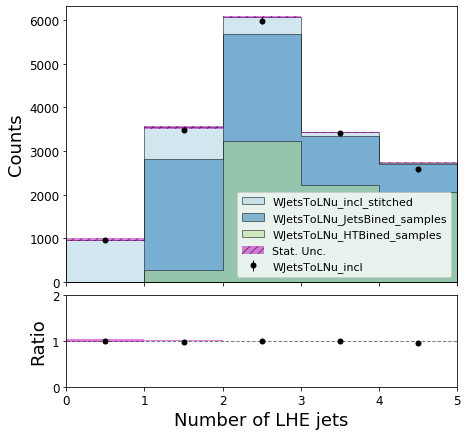

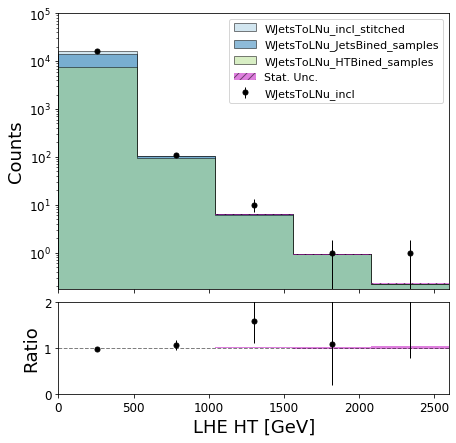

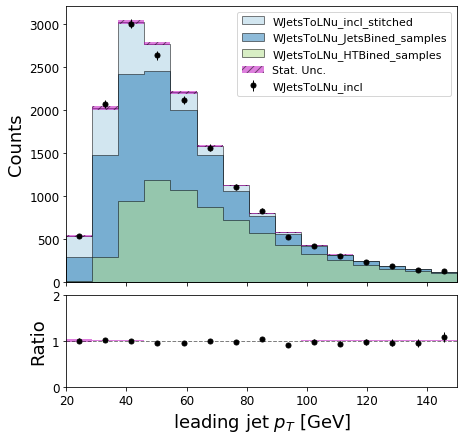

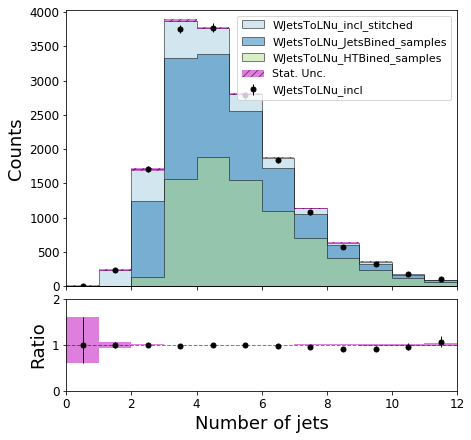

In [10]:
var = ['Njets','HT','pt_leading_jet','NJet']
for var_to_plot in var:
    hist_stitched = result_all[var_to_plot]
    hist_incl = result_inclOnly[var_to_plot]

    mapping = {
        'WJetsToLNu_incl_stitched': inclusive_samples,
        'WJetsToLNu_JetsBined_samples':exclusive_samples_NJets,
        'WJetsToLNu_HTBined_samples': exclusive_samples_HT,
    }
    hist_stitched = hist_stitched.group("ds", hist.Cat("ds", "Combined samples"), mapping)

    mapping = {
        'WJetsToLNu_incl': inclusive_samples
    }
    hist_incl = hist_incl.group("ds", hist.Cat("ds", "Combined samples"), mapping)

    if var_to_plot[0:2] == 'HT':
        hist_incl = hist_incl.rebin("HT", hist.Bin("HT","LHE HT [GeV]", 5, 0, 2600)) 
        hist_stitched = hist_stitched.rebin("HT", hist.Bin("HT","LHE HT [GeV]", 5, 0, 2600))

    plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
    })

    fig, (ax, rax) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(7,7),
        gridspec_kw={"height_ratios": (3, 1)},
        sharex=True
    )

    fig.subplots_adjust(hspace=.07)

    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
    ax.set_prop_cycle(cycler(color=colors))

    fill_opts = {
        'edgecolor': (0,0,0,0.3),
        'alpha': 0.5
    }

    data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
    }

    error_opts = {
        'label': 'Stat. Unc.',
        'hatch': '///',
        'facecolor': 'm',
        'alpha': 0.5,
        'edgecolor': (0,0,0,.5),
        'linewidth': 0
    }

    #incl samples
    hist.plot1d(
        hist_incl,
        overlay="ds",
        ax=ax,
        clear=False,
        error_opts=data_err_opts,
    )

    #stitched samples
    hist.plot1d(
        hist_stitched,
        overlay="ds",
        ax=ax,
        clear=False,
        stack=True,
        line_opts=None,
        fill_opts=fill_opts,
        error_opts=error_opts
    )

    ax.set_xlabel(None)
    leg = ax.legend(prop={'size': 11})
    if var_to_plot[0:2] == 'HT':
        ax.set_yscale('log')
        ax.set_ylim(0,100000)
    # now we build the ratio plot

    hist.plotratio(
        num=hist_incl.sum("ds"),
        denom=hist_stitched.sum("ds"),
        ax=rax,
        error_opts=data_err_opts,
        denom_fill_opts={'facecolor': 'm','alpha': 0.5},
        guide_opts={},
        unc='num'
    )

    rax.set_ylabel('Ratio')
    rax.set_ylim(0,2)
    #rax.set_xlim(0, xlim)
    plt.savefig(f'{DIR_PATH}/figures/stitching/WJets/stitchedVSincl_' + var_to_plot + '.pdf',format='pdf')